In [ ]:
# 参考链接：知乎_https://zhuanlan.zhihu.com/p/331581244?utm_id=0

In [2]:
import rasterio as rio
from rasterio.plot import show
from sklearn import cluster
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Open the image
elhas_raster = rio.open(r'E:\Desktop\Summary\种植结构提取-水稻\datas\Kmean\clip2021-08-22_4074_S2DL.tif')
print(elhas_raster.meta)

{'driver': 'GTiff', 'dtype': 'int16', 'nodata': 0.0, 'width': 635, 'height': 321, 'count': 23, 'crs': CRS.from_epsg(4326), 'transform': Affine(8.983152841196665e-05, 0.0, 117.89974879038024,
       0.0, -8.983152841193629e-05, 33.29048645112852)}


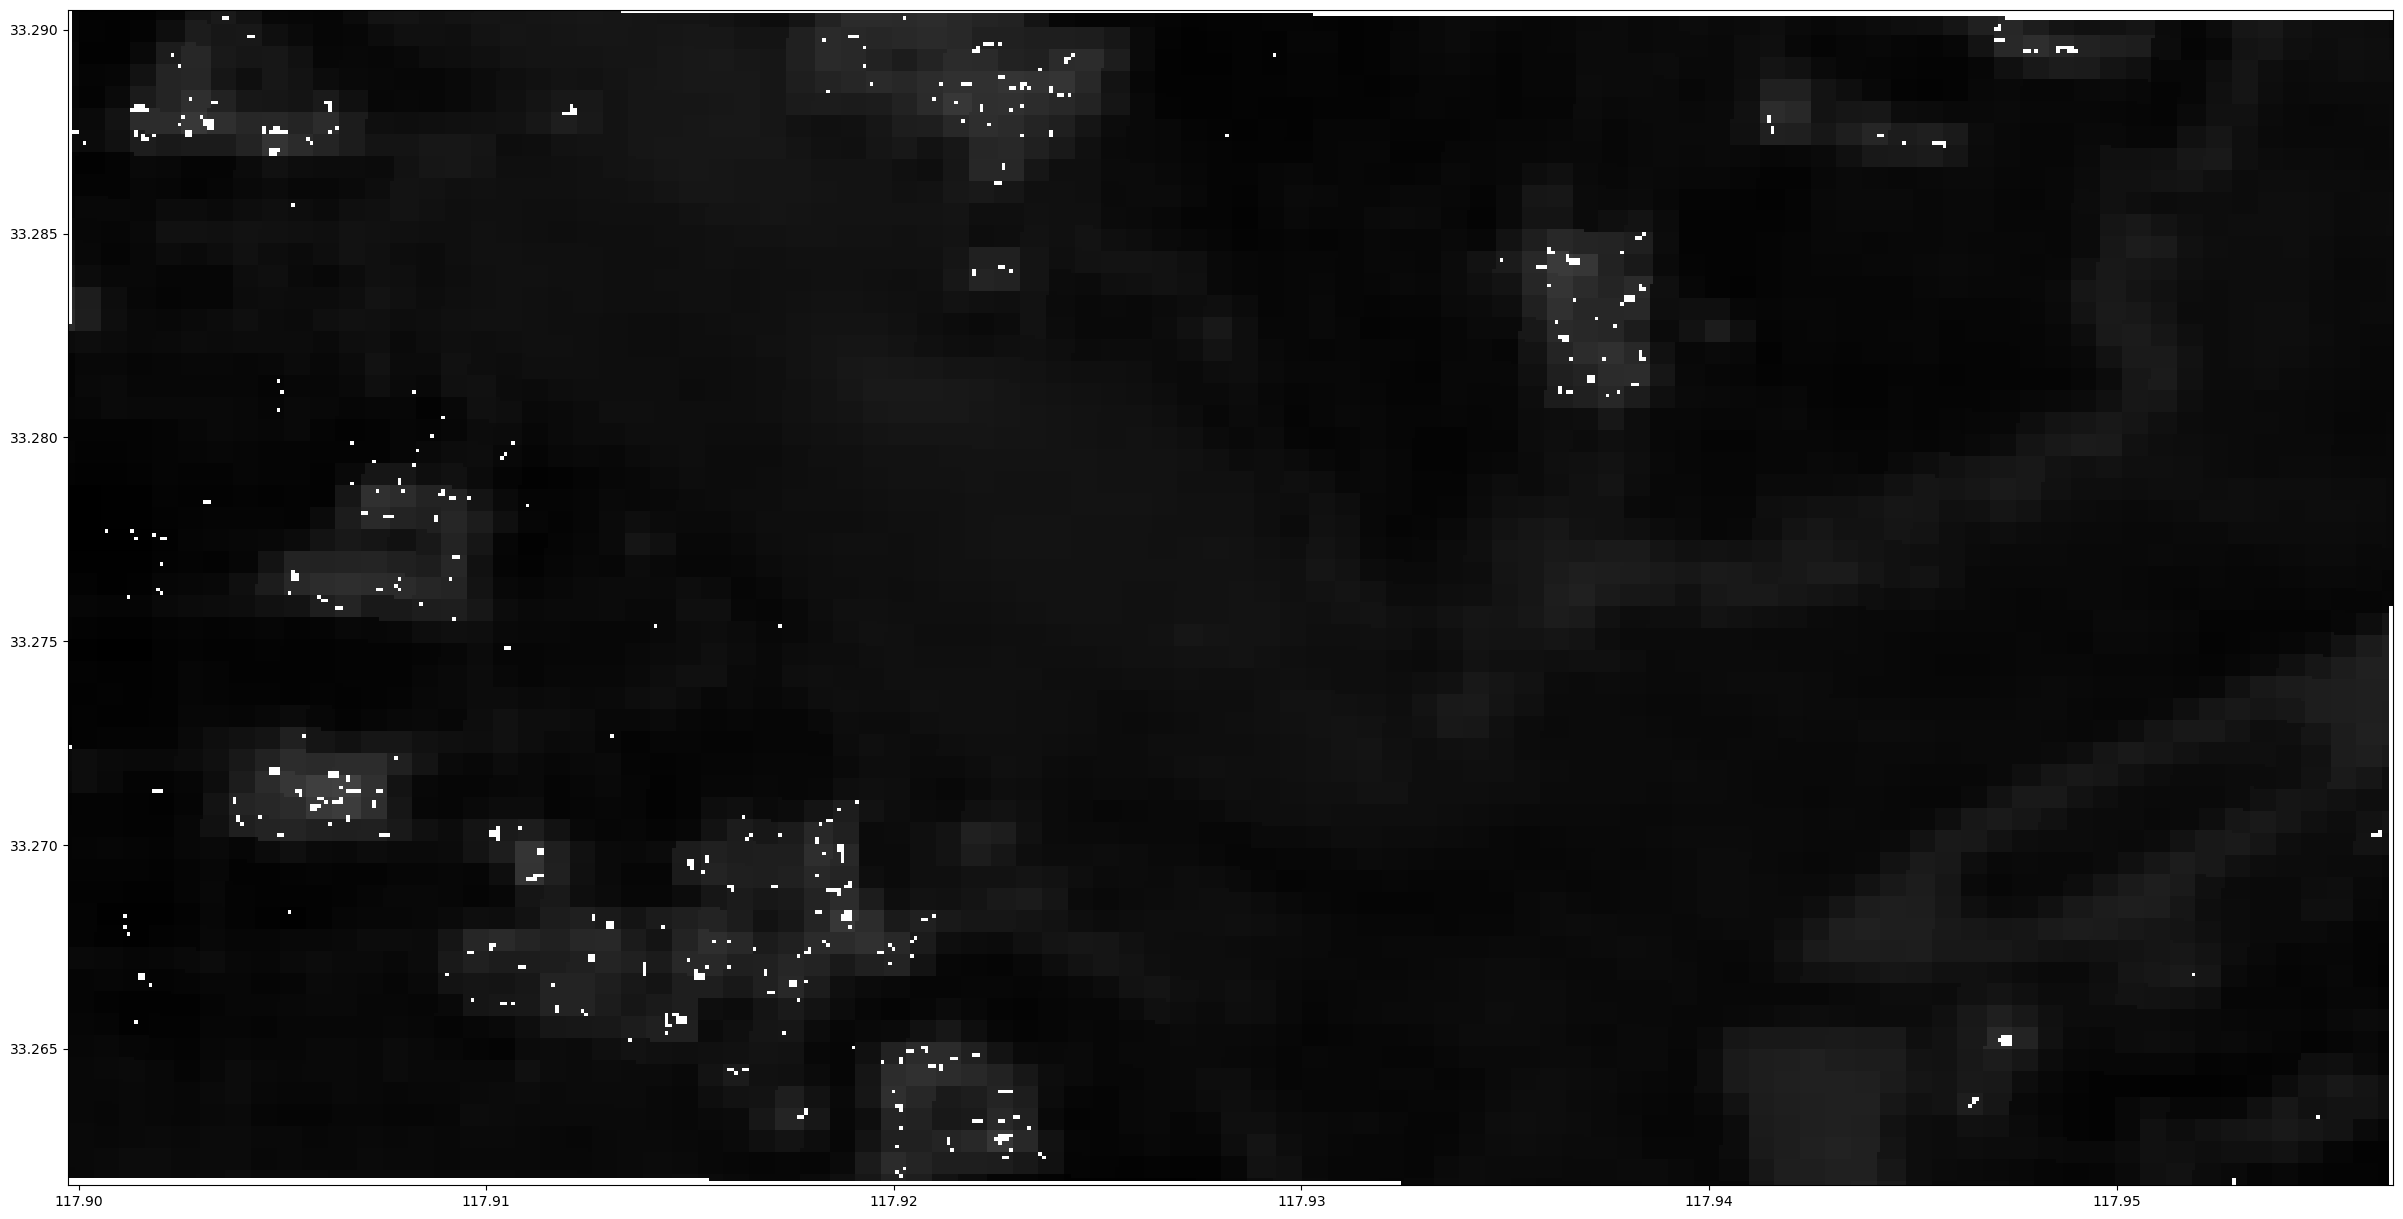

In [4]:
# Read, enhance and show the image
elhas_arr = elhas_raster.read()  # read the opened image
vmin, vmax = np.nanpercentile(elhas_arr, (5, 95))  # 5-95% contrast stretch
# show the enhanced image
plt.figure(figsize=[30, 20])
show(elhas_raster, cmap='gray', vmin=vmin, vmax=vmax)
plt.show()

In [5]:
imgxyb = np.empty((elhas_raster.height, elhas_raster.width, elhas_raster.count), elhas_raster.meta['dtype'])
# loop through the raster's bands to fill the empty array
for band in range(imgxyb.shape[2]):
    imgxyb[:, :, band] = elhas_raster.read(band + 1)

In [6]:
img1d = imgxyb[:, :, :].reshape((imgxyb.shape[0] * imgxyb.shape[1], imgxyb.shape[2]))

In [7]:
type(img1d)

numpy.ndarray

In [9]:
img1d[0].reshape(1,-1)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0]], dtype=int16)

In [14]:

from tqdm import tqdm

# cl = cluster.KMeans(n_clusters=4,max_iter=3)  # create an object of the classifier
cl = cluster.KMeans(n_clusters=4, batch_size=1000, max_iter=3, verbose=1)  # create an object of the classifier
# cl.fit(img1d)
# for i in tqdm(img1d):
#     param = cl.fit(i.reshape(1,-1))  # train it
for i in tqdm(range(30)):
    cl.fit(img1d)
# fit_wrapper = tqdm(cl.fit, total=1)
# fit_wrapper(img1d)

TypeError: __init__() got an unexpected keyword argument 'batch_size'

In [11]:
img1d

array([[  0,   0,   0, ...,   0,   0,   0],
       [102,  81, 467, ...,   0,   0,   0],
       [102, 142, 495, ...,   0,   0,   0],
       ...,
       [ 59, 146, 673, ...,   0,   0,   0],
       [ 59, 165, 634, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=int16)

In [15]:
from sklearn.cluster import MiniBatchKMeans
from tqdm import tqdm

cl = MiniBatchKMeans(n_clusters=2, batch_size=1000, max_iter=3, verbose=1)
for i in tqdm(range(9)):
    cl.partial_fit(img1d)


  0%|          | 0/9 [00:00<?, ?it/s]D:\Users\dell\anaconda3\envs\sklearn38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
100%|██████████| 9/9 [00:00<00:00, 24.59it/s]


In [16]:
img_cl = cl.labels_  # get the labels of the classes
img_cl = img_cl.reshape(imgxyb[:, :, 0].shape)  # reshape labels to a 3d array (one band only)

# 输出影像

In [17]:
meta = elhas_raster.meta
meta.update(driver='GTiff', dtype=rio.float32, count=1)
with rio.open(r'E:\Desktop\Summary\种植结构提取-水稻\datas\Kmean\result20230422.tif', 'w', **meta) as dst:
    dst.write(img_cl.astype(rio.float32), 1)

# 导出JPG配色图像

In [ ]:
# from Demos.win32cred_demo import mc
import matplotlib as mpl

# Create a custom color map to represent our different 4 classes
cmap = mpl.colors.LinearSegmentedColormap.from_list("", ["black", "red", "green", "yellow"])
# Show the resulting array and save it as jpg image
plt.figure(figsize=[20, 20])
plt.imshow(img_cl, cmap=cmap)
plt.axis('off')
plt.savefig(r"E:\Desktop\Summary\种植结构提取-水稻\datas\Kmean\elhas_clustered.jpg", bbox_inches='tight')
plt.show()